In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading .csv file
raw = pd.read_csv('Crop_recommendation.csv')

In [3]:
# Copying the data frame so that original one stay intact.

processed = raw.copy()

In [4]:
processed

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## Checking label 

In [5]:
# Labels
processed.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
processed.label.value_counts()
# No data imbalance in Label or target.

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

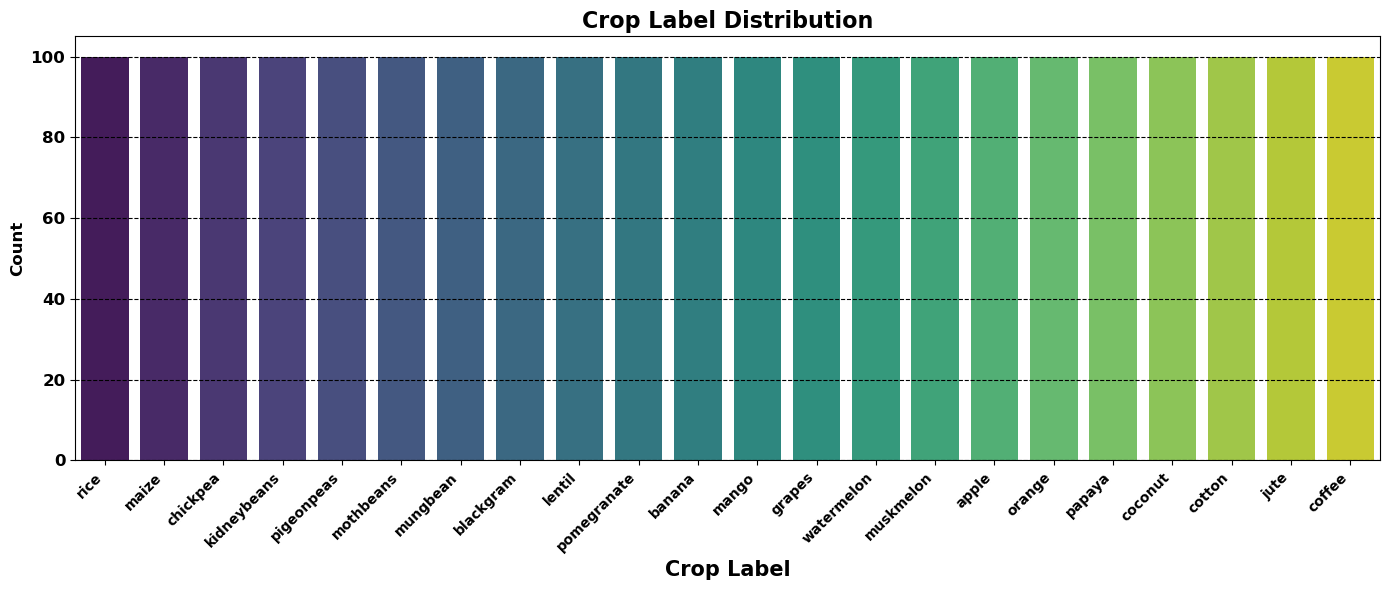

In [7]:
# Visualizing label

plt.figure(figsize=(14, 6))

sns.countplot(
    data=processed,
    x='label',
    palette='viridis'
)

plt.title('Crop Label Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Crop Label', fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=1, color='black')

plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [8]:
# As the label is a categorical column, so we have to do do label encoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

processed['label'] = encoder.fit_transform(processed['label'])

In [9]:
print(f"Unique labels after enoding -> {processed.label.unique()}")

Unique labels after enoding -> [20 11  3  9 18 13 14  2 10 19  1 12  7 21 15  0 16 17  4  6  8  5]


In [10]:
print("No of unique classes -> ", processed.label.nunique())

No of unique classes ->  22


In [11]:
processed.label.value_counts().sort_index()

label
0     100
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
Name: count, dtype: int64

* #### Now doing one thing Maping the Labels names with their numbers after encoding. It will help in prediction.

In [12]:
label_mapping_df = pd.DataFrame({
    'Number': range(len(encoder.classes_)),
    'Name': encoder.classes_
})

# Save mapping to CSV
label_mapping_df.to_csv('Label_numbers.csv', index=False)

print("✅ Label mapping saved as 'Label_numbers.csv'")

✅ Label mapping saved as 'Label_numbers.csv'


In [13]:
processed

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


## Checking features

In [14]:
processed.describe()
# As we can see min and max are not 0 and 1 or  , so we can do sacling.
# Also we can do Standard scaling.

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


### Visualization of numerical columns

In [15]:
features = processed.drop('label', axis=1).select_dtypes(include='number').columns.tolist()
features

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

* #### Boxplot visualization before Outlier Treatment

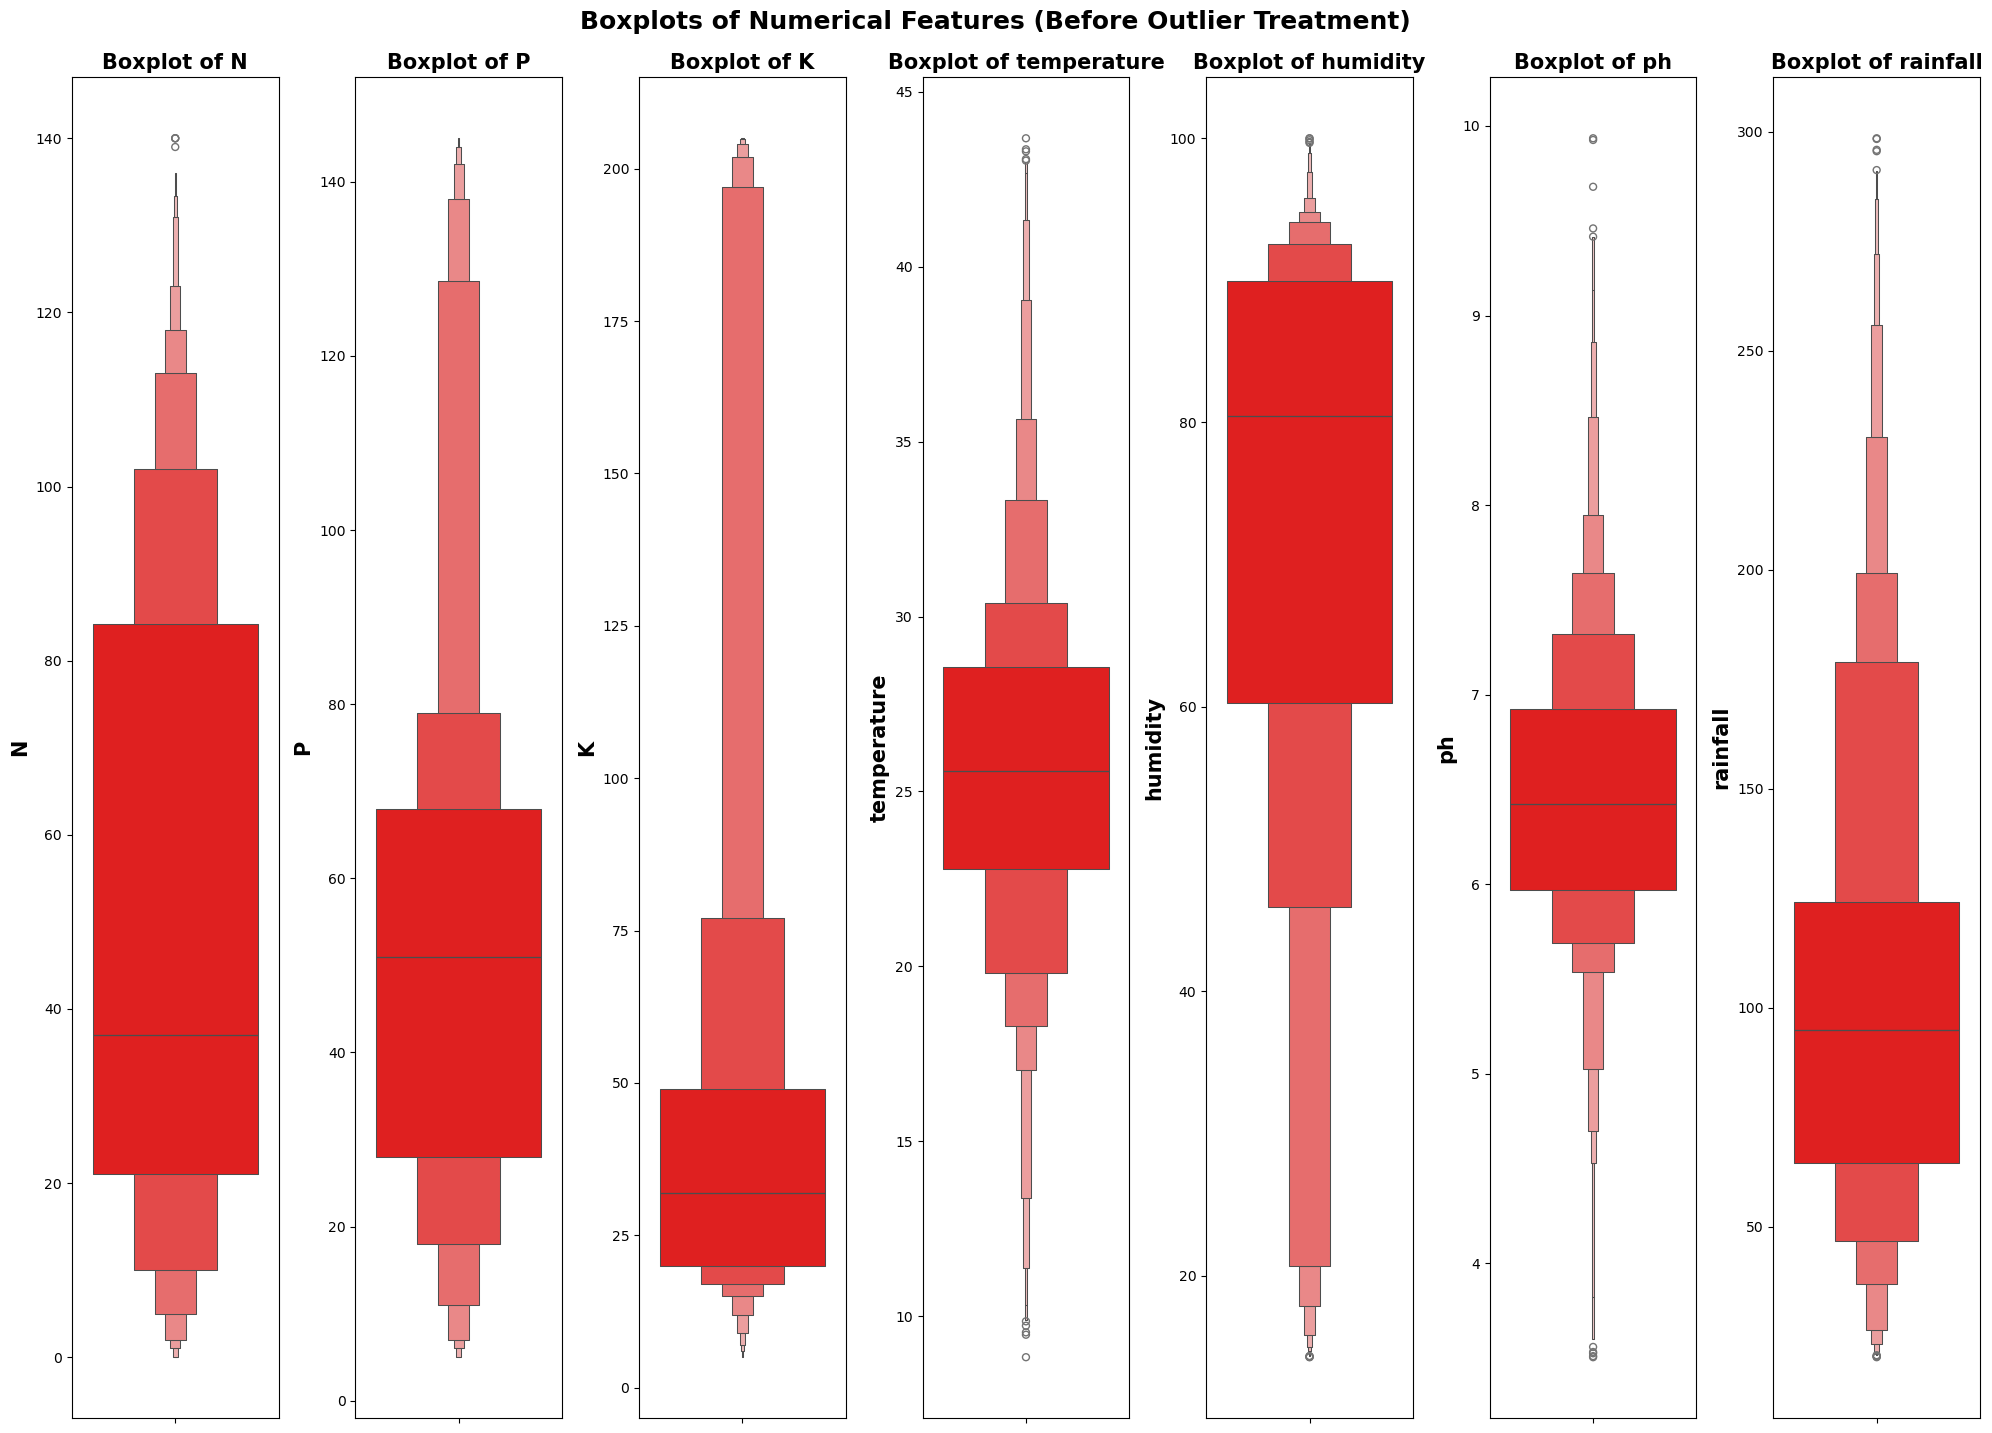

In [16]:
plt.figure(figsize=(20,14))

for indx, col in enumerate(features):
    plt.subplot(1, len(features), indx+1)

    sns.boxenplot(y=processed[col], color='red')
    plt.title(f"Boxplot of {col}",fontsize=15, fontweight='bold')

    plt.ylabel(f'{col}', fontsize=15, fontweight='bold')
    plt.tight_layout()

plt.suptitle("Boxplots of Numerical Features (Before Outlier Treatment)", fontsize=18, y=1.02, fontweight='bold')
plt.show()

* #### Outlier counting

In [17]:
outlier_counts = {}

for col in features:
    Q1 = processed[col].quantile(0.25)
    Q3 = processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = processed[(processed[col] < lower_bound) | (processed[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Display outlier counts as a DataFrame
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier_Count'])
outlier_df.sort_values(by='Outlier_Count', ascending=False, inplace=True)
print(outlier_df)

             Outlier_Count
K                      200
P                      138
rainfall               100
temperature             86
ph                      57
humidity                30
N                        0


* ##### Doing outlier treatment for only -> ['K', 'P', 'rainfall']

In [18]:
# List of columns for outlier treatment
outlier_cols = ['K', 'P', 'rainfall']

# Function to apply IQR-based capping
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping values outside the bounds
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    # Any value below the lower bound is replaced with the lower bound.

    # Any value above the upper bound is replaced with the upper bound.
    
    # All other values remain the same.

    print(f"✅ Treated outliers in '{column}' using IQR capping.")

# Apply to the 'processed' dataframe
for col in outlier_cols:
    cap_outliers_iqr(processed, col)

✅ Treated outliers in 'K' using IQR capping.
✅ Treated outliers in 'P' using IQR capping.
✅ Treated outliers in 'rainfall' using IQR capping.


* #### Boxplot visualization after Outlier Treatment

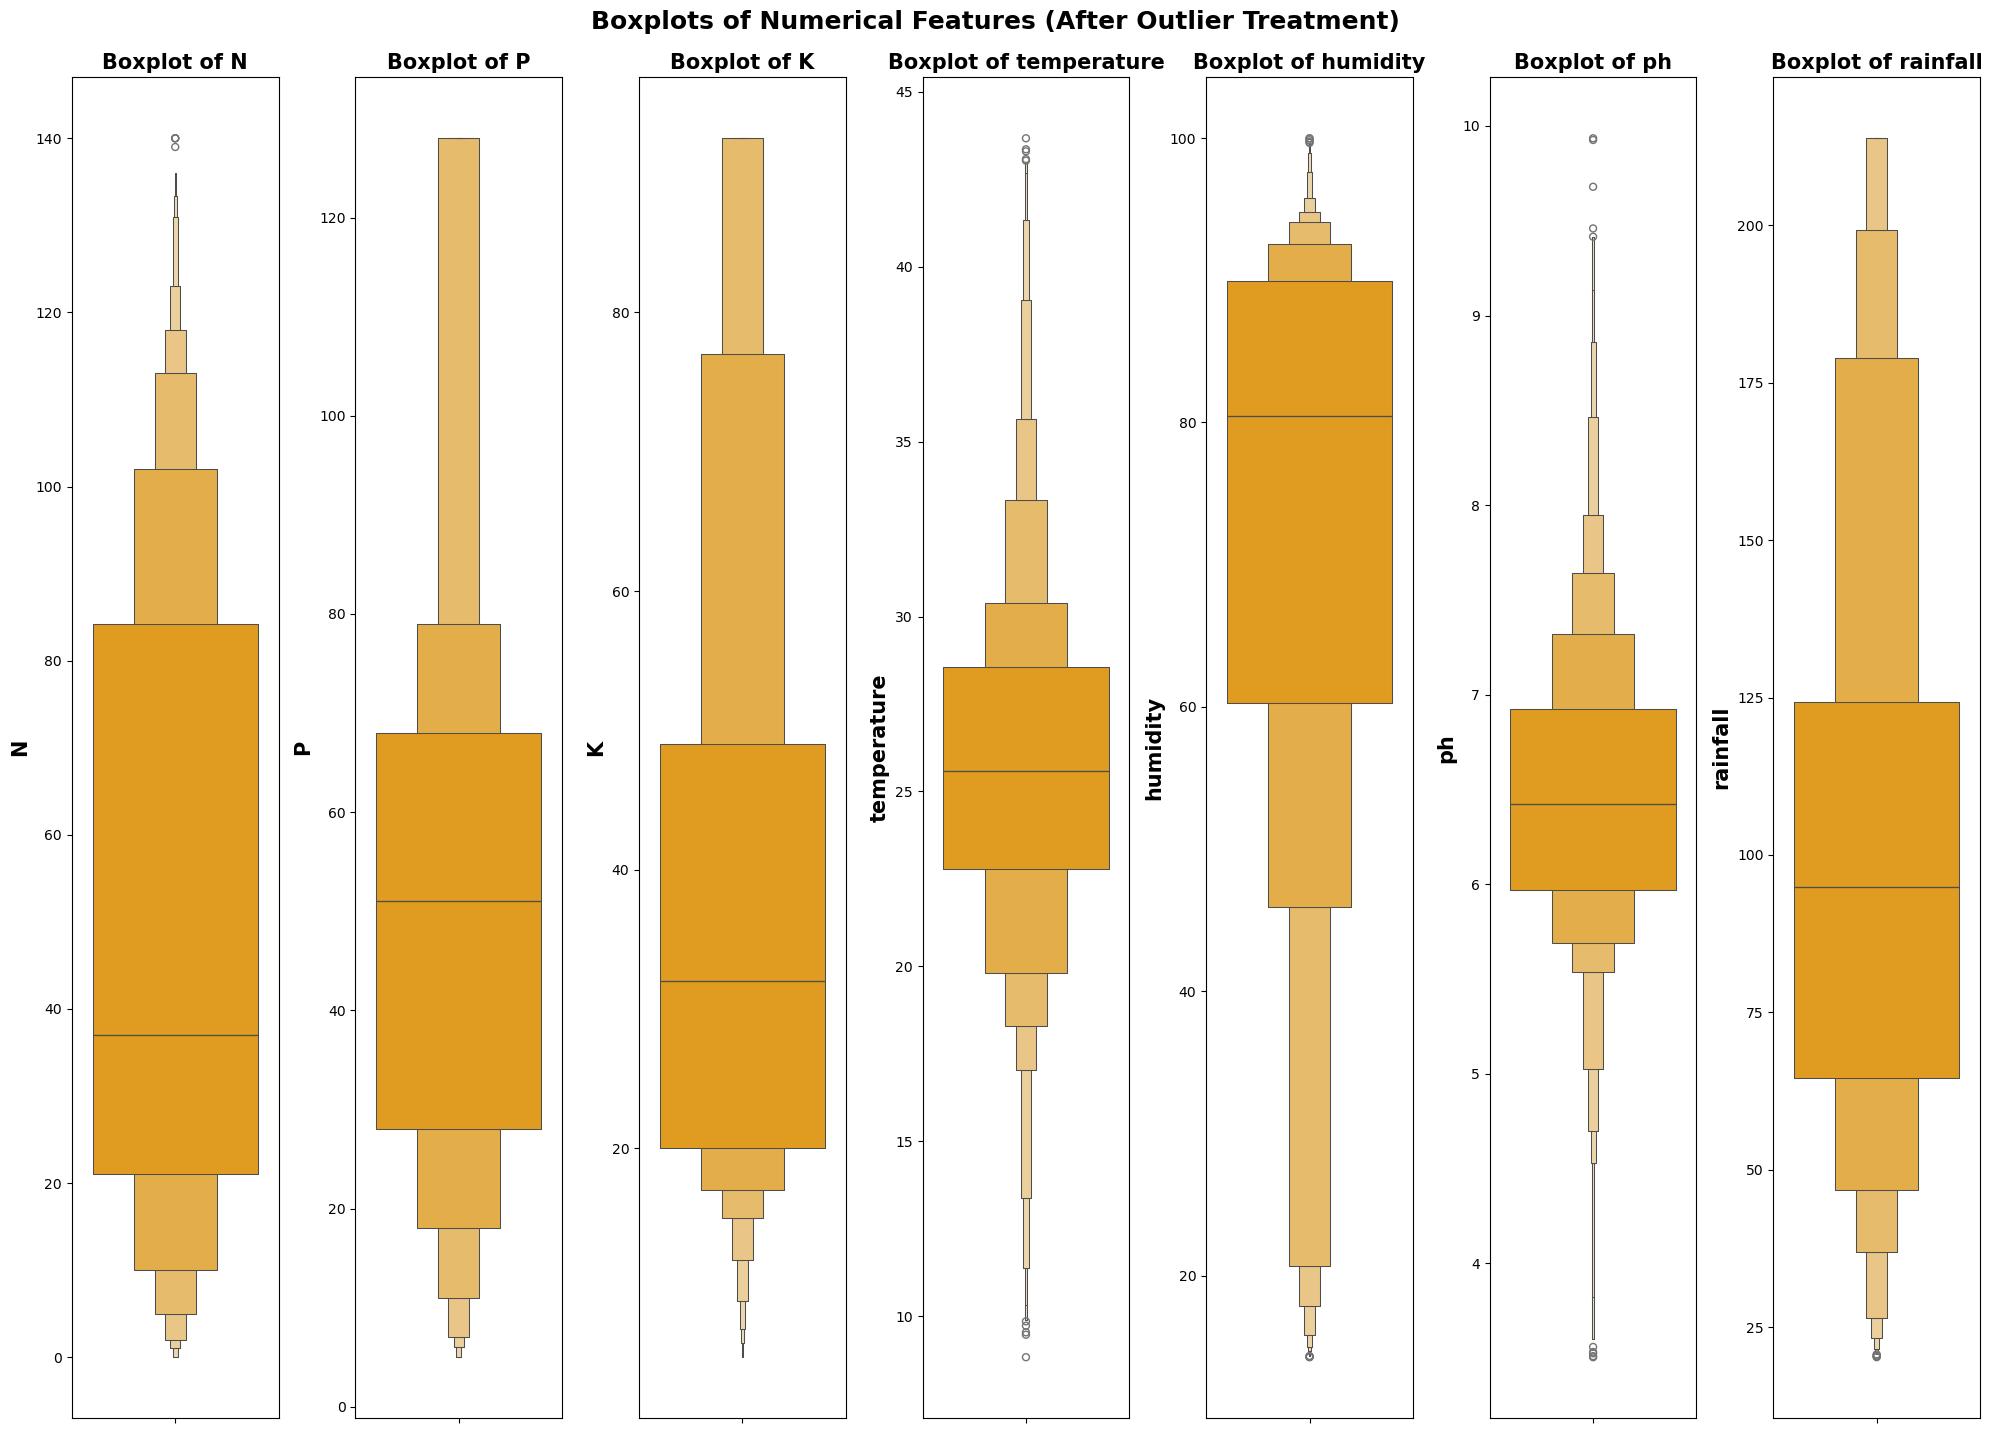

In [19]:
plt.figure(figsize=(20,14))

for indx, col in enumerate(features):
    plt.subplot(1, len(features), indx+1)

    sns.boxenplot(y=processed[col], color='orange')
    plt.title(f"Boxplot of {col}",fontsize=15, fontweight='bold')

    plt.ylabel(f'{col}', fontsize=15, fontweight='bold')
    plt.tight_layout()

plt.suptitle("Boxplots of Numerical Features (After Outlier Treatment)", fontsize=18, y=1.02, fontweight='bold')
plt.show()

* #### Checking for Null value

In [20]:
processed.isna().sum()
# No Null value in the dataset

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [21]:
processed.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,52.743182,38.376364,25.616244,71.481779,6.469480,101.986465,10.500000
std,36.917334,31.427156,23.460322,5.063749,22.263812,0.773938,51.165743,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,128.000000,92.500000,43.675493,99.981876,9.935091,213.841241,21.000000


* #### Visualization of Numerical features before Scaling

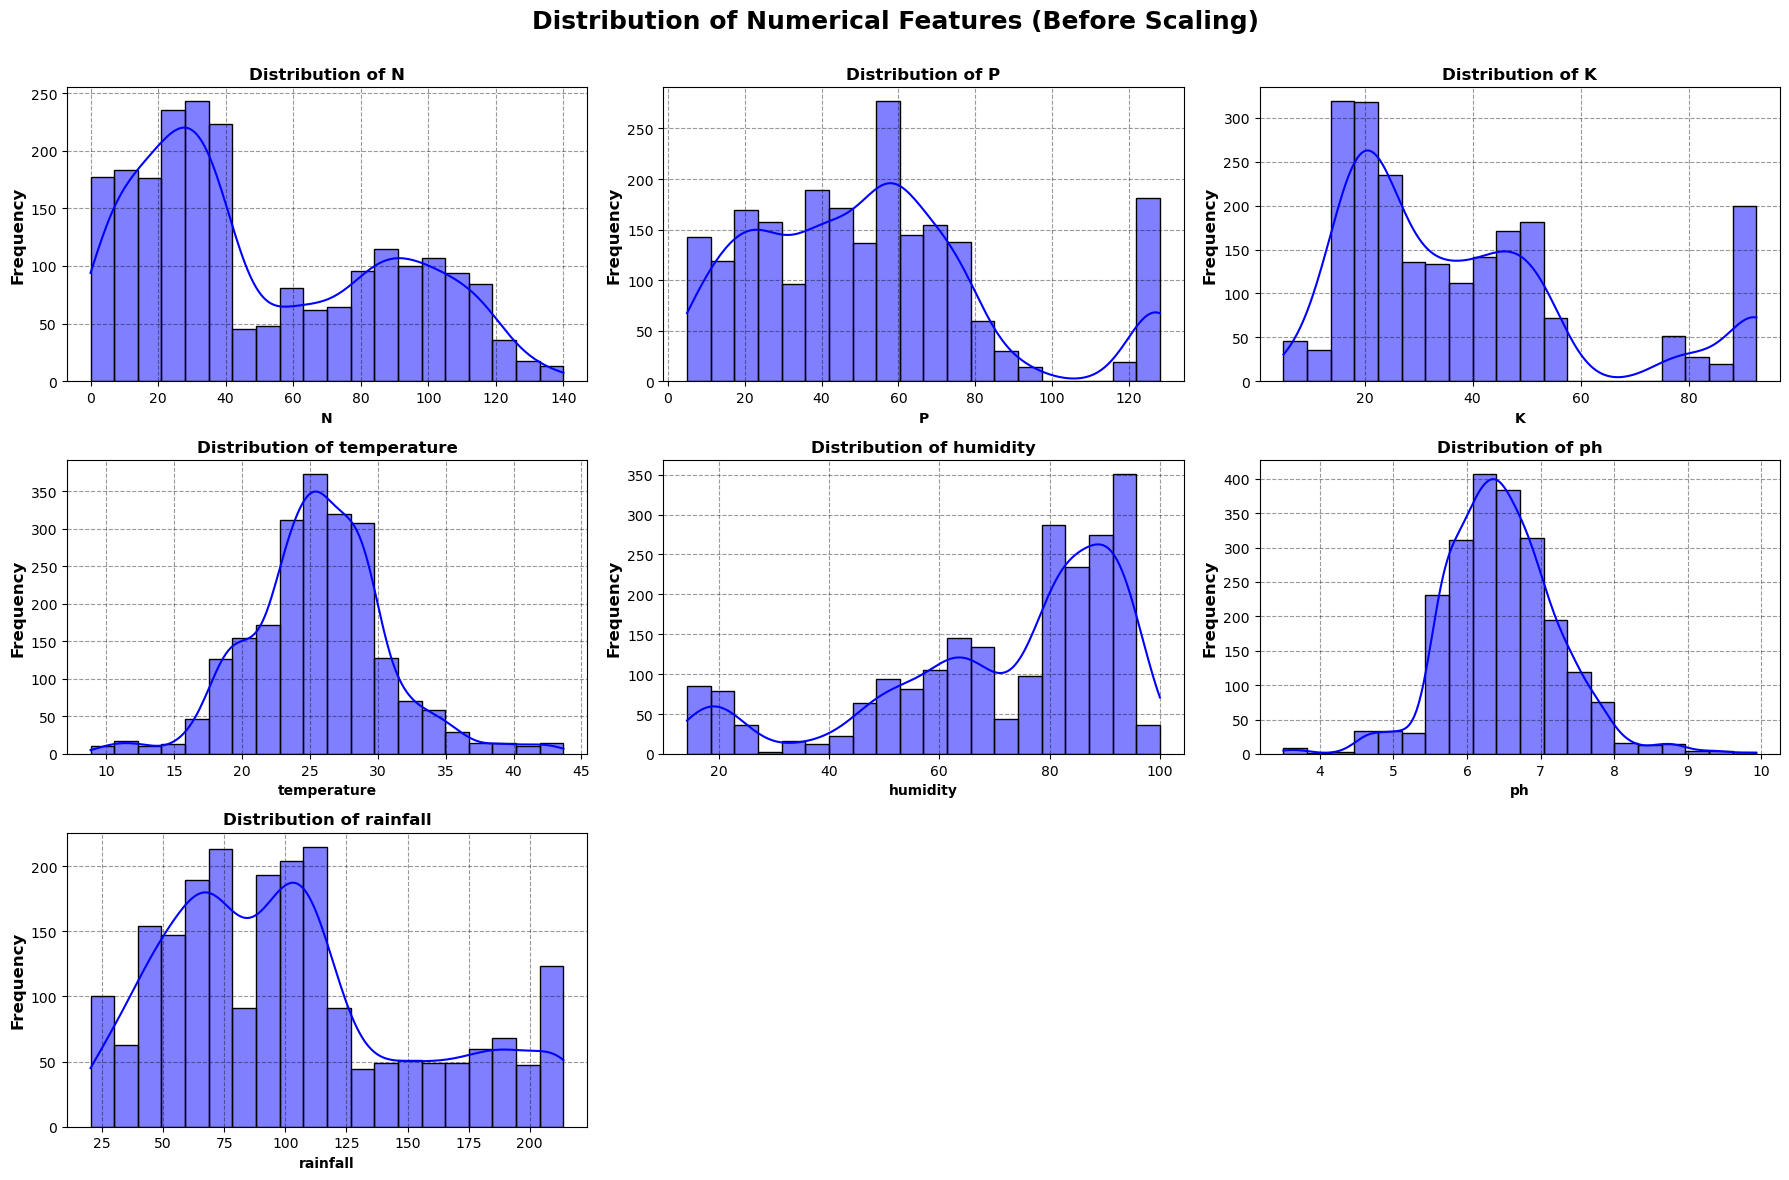

In [22]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(processed[col], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {col}", fontweight='bold')
    plt.xlabel(col, fontsize=10, fontweight='bold')
    plt.ylabel("Frequency", fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.4, color='black')

plt.suptitle("Distribution of Numerical Features (Before Scaling)\n", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

### Scaling
* #### Standard Scaler
* mean = 0, std = 1

In [23]:
from sklearn.preprocessing import StandardScaler

# Separate label
label_col = processed['label']
features_only = processed.drop('label', axis=1)

# Apply StandardScaler only on numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_only)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features_only.columns)

# Reattach the label column
processed = pd.concat([scaled_df, label_col.reset_index(drop=True)], axis=1)

In [24]:
processed

,N,P,K,temperature,humidity,ph,rainfall,label
0,1.068797,-0.341922,0.197128,-0.935587,0.472666,0.043302,1.973430,20
1,0.933329,0.167308,0.111858,-0.759646,0.397051,0.734873,2.186623,20
2,0.255986,0.071827,0.239763,-0.515898,0.486954,1.771510,2.186623,20
3,0.635298,-0.564710,0.069223,0.172807,0.389805,0.660308,2.186623,20
4,0.743673,-0.341922,0.154493,-1.083647,0.454792,1.497868,2.186623,20
...,...,...,...,...,...,...,...,...
2195,1.529390,-0.596536,-0.271855,0.228814,-0.227709,0.401395,1.481563,5
2196,1.312641,-1.201247,-0.485030,0.355720,-0.666947,-0.494413,0.507059,5
2197,1.827421,-0.628363,-0.357125,-0.293218,-0.191235,-0.138120,1.394538,5
2198,1.800327,-0.660190,-0.186586,0.129612,-0.869518,0.373904,0.492411,5


* #### Visualization of Numerical features after Scaling

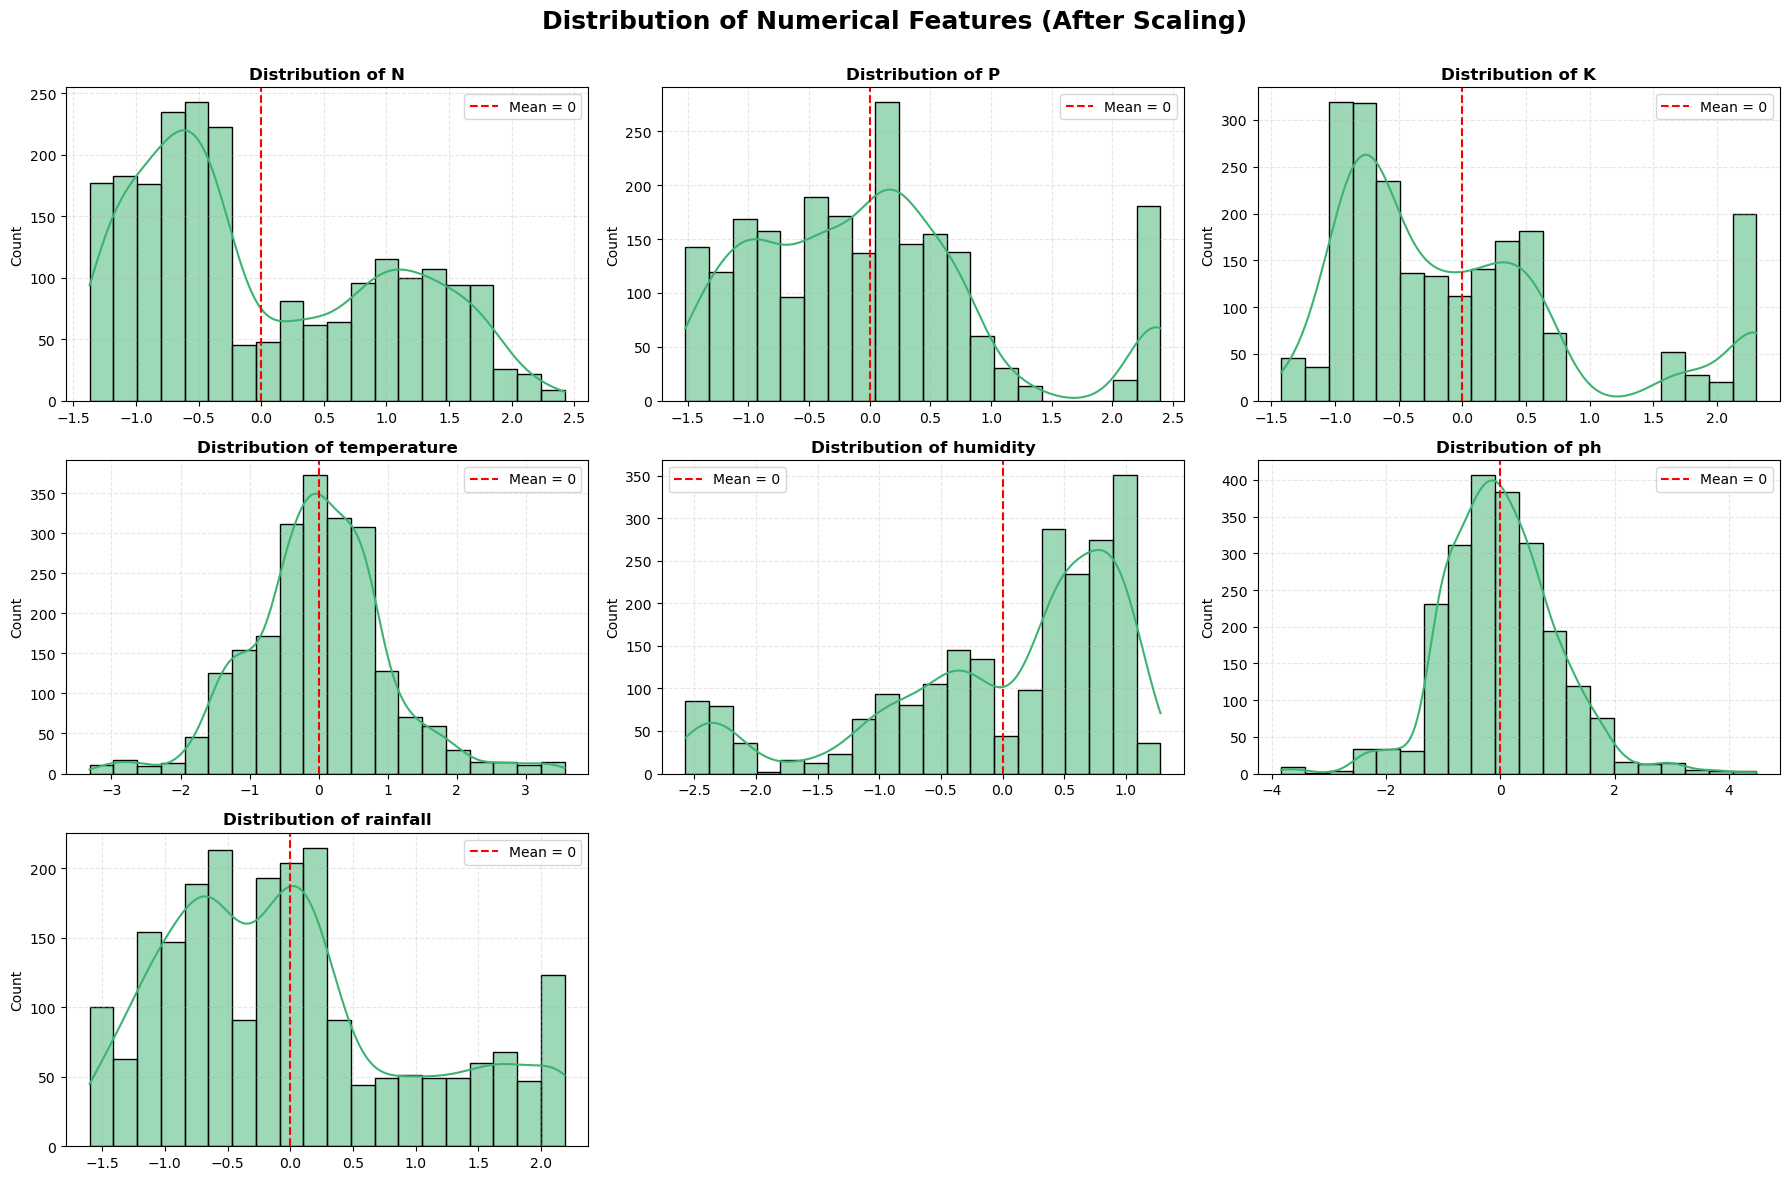

In [25]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(processed[col], kde=True, bins=20, color='mediumseagreen')
    plt.axvline(0, color='red', linestyle='--', label='Mean = 0')
    plt.title(f"Distribution of {col}", fontweight='bold')
    plt.xlabel("")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    
plt.suptitle("Distribution of Numerical Features (After Scaling)\n", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

In [26]:
processed.describe()
# Standard scaler done success fully

,N,P,K,temperature,humidity,ph,rainfall,label
count,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2200.000000
mean,-1.033517e-16,1.291896e-17,5.167584e-17,3.875688e-16,-1.808654e-16,-1.291896e-16,-7.751375e-17,10.500000
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,6.345731
min,-1.369636e+00,-1.519515e+00,-1.422996e+00,-3.316592e+00,-2.570842e+00,-3.831577e+00,-1.598605e+00,0.000000
25%,-8.006682e-01,-7.874975e-01,-7.834735e-01,-5.623337e-01,-5.040636e-01,-6.433340e-01,-7.318039e-01,5.000000
50%,-3.671690e-01,-5.547998e-02,-2.718553e-01,-3.466729e-03,4.039475e-01,-5.742697e-02,-1.391646e-01,10.500000
75%,9.130086e-01,4.855764e-01,4.529372e-01,5.817982e-01,8.296508e-01,5.869540e-01,4.355670e-01,16.000000
max,2.423483e+00,2.395187e+00,2.307553e+00,3.567190e+00,1.280400e+00,4.478912e+00,2.186623e+00,21.000000


* ### Now store processed as csv file

In [27]:
processed.to_csv('Cleaned_dataset.csv', index=False)
print("Saved as Claened_dataset.csv")

Saved as Claened_dataset.csv


In [33]:
processed.label.value_counts().sort_index()

label
0     100
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
Name: count, dtype: int64

* ### Save the Scaler for future use

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib
import os

# Load your main dataset
df = pd.read_csv("Crop_recommendation.csv")

# Features to scale
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

# Fit the scaler
scaler = StandardScaler()
scaler.fit(X)

# Create directory if not exists
os.makedirs('Saved_models', exist_ok=True)

# Save the scaler
joblib.dump(scaler, 'Saved_models/scaler.pkl')

print("✅ Scaler saved as 'Saved_models/scaler.pkl'")


✅ Scaler saved as 'Saved_models/scaler.pkl'
